In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from sklearn import linear_model

In [2]:
np.random.seed(1)
X = 1.5 * np.random.randn(100) + 10.5   # Array of 1000 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 1000 residual terms
y = 20 + 0.3 * X  + res 

In [3]:
df = pd.DataFrame({'StudyTime': X,'Score': y})

In [4]:
df

,StudyTime,Score
0,12.936518,23.657391
1,9.582365,23.486963
2,9.707742,23.114069
3,8.890547,22.963953
4,11.798111,22.991978
...,...,...
95,10.616010,22.371084
96,9.984219,23.296425
97,10.565395,23.379760
98,9.569999,23.276475


In [5]:
max(X)


13.778363109799741

In [6]:
min(X)

7.047691954679576

In [7]:
max(y)

25.228858797424788

In [8]:
min(y)

21.57339618758479

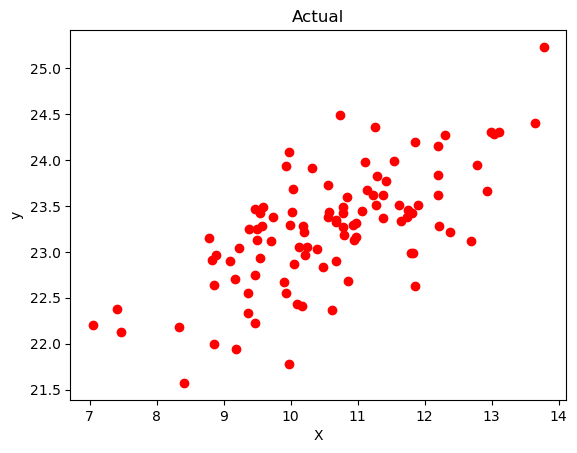

In [9]:
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [10]:
def loss_function(m1,m2,m3, b, points):
    total_error =0
    for i in range(len(points)):
        x=points.iloc[i].StudyTime
        yy=points.iloc[i].Score
        total_error += (yy-(m1*(x**3)+m2*(x**2)+m3*x+b))**2
    return total_error/ float(len(points))    
    
    

In [11]:
def gradient_descent(m1_now,m2_now,m3_now,b_now,points,L):
    m1_gradient =0
    m2_gradient =0
    m3_gradient =0
    b_gradient =0
    n=len(points)
    
    for i in range(n):
        x=points.iloc[i].StudyTime
        yy= points.iloc[i].Score
        
        m1_gradient += -(2/n)*(x**3)*(yy-(m1_now*(x**3)+m2_now*(x**2)+m3_now*x+b_now))
        m2_gradient += -(2/n)*(x**2)*(yy-(m1_now*(x**3)+m2_now*(x**2)+m3_now*x+b_now))
        m3_gradient += -(2/n)*(x)*(yy-(m1_now*(x**3)+m2_now*(x**2)+m3_now*x+b_now))
        
        b_gradient += -(2/n)* (yy-(m1_now*(x**3)+m2_now*(x**2)+m3_now*x+b_now))
        
    m1 = m1_now - m1_gradient *L
    m2 = m2_now - m2_gradient *L
    m3 = m3_now - m3_gradient *L
    b = b_now - b_gradient *L
    return m1,m2,m3,b
    

In [12]:
m1 =0
m2 =0
m3 =0
b =0

batchs=10
batch_size=int(len(df)/float(batchs))

L=0.000000540 #try 0.008 and 0.009
epochs =50000

In [13]:
for i in range(epochs):
    if i% 500 == 0:
        print(f"Epoch: {i}")
        print(m1,m2,m3,b)
    for j in range(0,batchs):
         m1,m2,m3,b = gradient_descent(m1,m2,m3,b,df[j*batch_size:(j+1)*batch_size],L)
    
#print(m,b)

Epoch: 0
0 0 0 0
Epoch: 500
-0.017409060681415157 0.4029511304714082 0.07416608327330661 0.010402387088416216
Epoch: 1000
-0.02798064177033724 0.4945780111018587 0.0923620815356999 0.013147067408791178
Epoch: 1500
-0.030390724640558454 0.515328138689937 0.0977641994944241 0.014139047736685157
Epoch: 2000
-0.03093192061055004 0.5198483629662505 0.1002363282648493 0.01472958052669703
Epoch: 2500
-0.031045165753314726 0.5206521879441218 0.10203718627001616 0.015228087174559996
Epoch: 3000
-0.031060417960345026 0.5206050630088084 0.10368399430576612 0.015705421670586594
Epoch: 3500
-0.031053233816915795 0.5203631433031727 0.10529519011483145 0.016177808795822864
Epoch: 4000
-0.03104091491672709 0.520076680838566 0.10689789467843984 0.016648963866741827
Epoch: 4500
-0.031027423126202068 0.5197800815911703 0.10849831848306773 0.017119737675392276
Epoch: 5000
-0.03101366566667917 0.5194812241191382 0.11009788375085364 0.017590325070460835
Epoch: 5500
-0.030999850280681685 0.5191819125050581 0

Epoch: 44500
-0.029932366431663686 0.4960730551786154 0.23508544611057702 0.05436211982429228
Epoch: 45000
-0.029918827549915605 0.49577996670703034 0.23665037447902282 0.05482251844358983
Epoch: 45500
-0.029905292359617953 0.495486958145763 0.23821487620104048 0.05528279131702321
Epoch: 46000
-0.029891760859764072 0.4951940294730226 0.23977895139296462 0.055742938478879296
Epoch: 46500
-0.029878233049347967 0.494901180667029 0.24134260017109557 0.056202959963435856
Epoch: 47000
-0.029864708927363252 0.49460841170600167 0.24290582265170135 0.05666285580496108
Epoch: 47500
-0.029851188492804624 0.49431572256817263 0.2444686189510221 0.057122626037713835
Epoch: 48000
-0.029837671744666307 0.49402311323177395 0.24603098918526395 0.057582270695943745
Epoch: 48500
-0.0298241586819434 0.4937305836750486 0.24759293347060027 0.05804178981389127
Epoch: 49000
-0.029810649303630716 0.49343813387624064 0.24915445192317495 0.05850118342578749
Epoch: 49500
-0.029797143608723674 0.49314576381360287 0

In [14]:

ypred =m1*(X**3)+m2*(X**2)+ m3*X + b

In [15]:
z=loss_function(m1,m2,m3, b, df)
z

3.55351809767552

In [16]:
df.iloc[0].StudyTime


12.936518045494863

In [17]:
z= (df.iloc[0].StudyTime **3)*m1+(df.iloc[0].StudyTime **2)*m2 +df.iloc[0].StudyTime *m3+  b

z

21.32301165174722

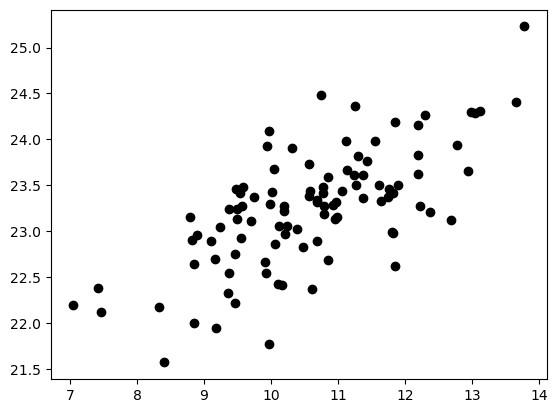

In [18]:
plt.scatter(df.StudyTime,df.Score,color="black")
#plt.plot(list(range(6,14)),[m*x+b for x in range(6,14)], color="red")
plt.show()

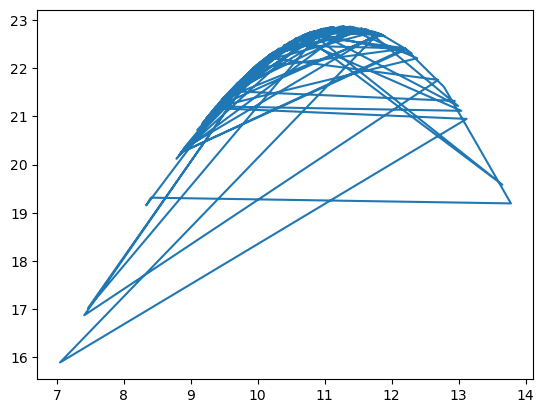

In [19]:
plt.plot(X, ypred)     # regression line
plt.show()

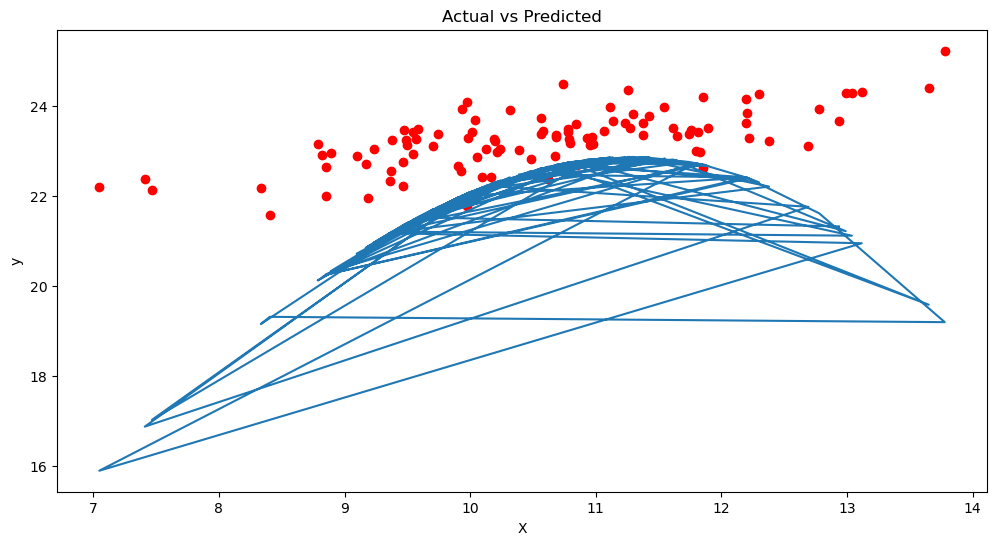

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.plot(X, ypred)     # regression line
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [21]:
def predict(value):
    #value = X
    for i in range(value):
        # straight line = m*x+y
       print(i, ':',df.iloc[i].StudyTime,':',df.iloc[i].Score,':', (df.iloc[0].StudyTime **3)*m1+(df.iloc[0].StudyTime **2)*m2 +df.iloc[0].StudyTime *m3+  b
,':',ypred[i])

In [22]:
predict(12)

0 : 12.936518045494863 : 23.65739113125546 : 21.32301165174722 : 21.32301165174722
1 : 9.582365379524887 : 23.486963466260214 : 21.32301165174722 : 21.525766360356307
2 : 9.707742371604816 : 23.114068532376844 : 21.32301165174722 : 21.707224675711284
3 : 8.890547066765745 : 22.96395338164826 : 21.32301165174722 : 20.328620130132062
4 : 11.798111443987018 : 22.991977510325583 : 21.32301165174722 : 22.72677138470822
5 : 7.047691954679576 : 22.198998802933204 : 21.32301165174722 : 15.891378260213266
6 : 13.11721764632472 : 24.305443519445554 : 21.32301165174722 : 20.948948857431162
7 : 9.358189648657346 : 22.330606593693233 : 21.32301165174722 : 21.173075310484112
8 : 10.978558644085648 : 23.160458340223883 : 21.32301165174722 : 22.821395700959126
9 : 10.125944436783884 : 23.054090604381845 : 21.32301165174722 : 22.225363418676125
10 : 12.693161905567461 : 23.12138991154686 : 21.32301165174722 : 21.75854805210281
11 : 7.409788935753519 : 22.380516376747202 : 21.32301165174722 : 16.8718336